# 09 - FSM - State Machines

## General
Al synchronous systems need to comply with the following conditions:

* All Flipflops use the same clock signal source
* No Flipflop has asynchronous inputs


## Moore Machines

* Flipflops save the internal state
* combinatorial logic bloc determines the future inner state depending to the current inner state and the current inputs
* combinatorial logic bloc determines the output signals depending on the current inner state

<img alt="Moore State Machine" src="img/09/moore_fsm.png" align="middle" width=500 />

### Example counter

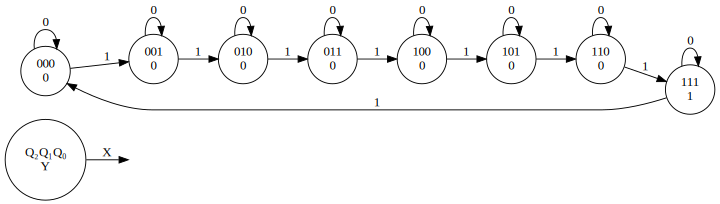

In [105]:
from graphviz import Digraph

f = Digraph('finite_state_machine')
f.attr(rankdir='LR', size='10')
f.attr('node', shape='none')
f.node("")

f.attr('node', shape='circle')
f.edge("Q₂Q₁Q₀\nY", "", label='X')
f.edge('000\n0', '000\n0', label='0')
f.edge('001\n0', '001\n0', label='0')
f.edge('010\n0', '010\n0', label='0')
f.edge('011\n0', '011\n0', label='0')
f.edge('100\n0', '100\n0', label='0')
f.edge('101\n0', '101\n0', label='0')
f.edge('110\n0', '110\n0', label='0')
f.edge('111\n1', '111\n1', label='0')
f.edge('000\n0', '001\n0', label='1')
f.edge('001\n0', '010\n0', label='1')
f.edge('010\n0', '011\n0', label='1')
f.edge('011\n0', '100\n0', label='1')
f.edge('100\n0', '101\n0', label='1')
f.edge('101\n0', '110\n0', label='1')
f.edge('110\n0', '111\n1', label='1')
f.edge('111\n1', '000\n0', label='1')
f

## Mealy Machines
In contrast to Moore machines, Mealy machines have outputs that can also depend on the inputs.

<img alt="Mealy State Machine" src="./img/09/mealy_fsm.png" align="middle" width=500/>


In [1]:
import nbwavedrom

a = {
  # Signal
  'signal': [
    # General
      { 'name': "clk", 'wave': 'P...', 'period':8},
      { 'name': "Q", 'wave': '2.......2.......2.......2.......', 'node': '................a'},
      { 'name': "X", 'wave': '0....1..........................', 'node': '.....b'},
      { 'name': "Y_Mealy", 'wave': '1....0..........1...............', 'node': '.....c..........d'},
      { 'name': "Y_Moore", 'wave': '1.......0.......1...............', 'node': '........e.......f'},
    ],
  # Arrows
  'edge': [
    'a~>d',
    'b~>c',
    'b~>e',
    'a~>f',
  ],
  # Footer
  'foot': {
    'text':['tspan', 'Temporal behaviour mealy vs moore',
    ],
  },
}
nbwavedrom.draw(a)

### Example Counter

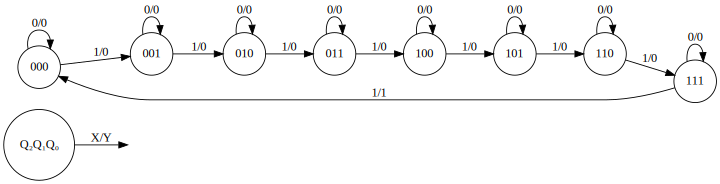

In [3]:
from graphviz import Digraph

f = Digraph('finite_state_machine')
f.attr(rankdir='LR', size='10')
f.attr('node', shape='none')
f.node("")

f.attr('node', shape='circle')
f.edge("Q₂Q₁Q₀", "", label='X/Y')
f.edge('000', '000', label='0/0')
f.edge('001', '001', label='0/0')
f.edge('010', '010', label='0/0')
f.edge('011', '011', label='0/0')
f.edge('100', '100', label='0/0')
f.edge('101', '101', label='0/0')
f.edge('110', '110', label='0/0')
f.edge('111', '111', label='0/0')
f.edge('000', '001', label='1/0')
f.edge('001', '010', label='1/0')
f.edge('010', '011', label='1/0')
f.edge('011', '100', label='1/0')
f.edge('100', '101', label='1/0')
f.edge('101', '110', label='1/0')
f.edge('110', '111', label='1/0')
f.edge('111', '000', label='1/1')
f

## Creation of a Finite State Machine
The state machines can be designed as follows: 
* Expressing the specification by means of a state graph,
* Fill in the status table,
* Reduction of the number of states,
* Coding of the states,
* Realization of the logical circuit.
The most delicate thing is to develop a state graph based on the system's specifications. For this purpose 3 methods are listed below.

### Development from a random state
One way to create a state graph is to proceed from state to state. To do this
- a certain state of the machine can be defined.
- For this state, all possible input conditions ($2^n$ cases for $n$ inputs) must be analyzed and the corresponding arrows drawn. Depending on the case, new states are created.
- Gradually carry out all not yet treated states, analyze all possible input conditions ($2^n$ cases for $n$ inputs) and draw the corresponding arrows. Each time a new state is created, it must be checked whether it already exists in the developing graph. Repeat this step until the graph is complete.

**Remark** There may be situations in which certain input conditions cannot occur. Significantly, this is the case when several input signals cannot change simultaneously due to the structure. In this case less than $2^n$ arrows lead away from each state.

#### Example Debouncing Circuit
See figures below

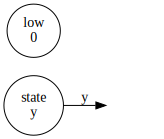

In [4]:
from graphviz import Digraph

f = Digraph('finite_state_machine')
f.attr(rankdir='LR', size='10')
f.attr('node', shape='none')
f.node("")

f.attr('node', shape='circle')
f.edge("state\ny", "", label='y')
f.node('low\n0', 'low\n0')
f

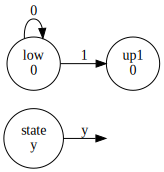

In [4]:
from graphviz import Digraph

f = Digraph('finite_state_machine')
f.attr(rankdir='LR', size='10')
f.attr('node', shape='none')
f.node("")

f.attr('node', shape='circle')
f.edge("state\ny", "", label='y')
f.edge('low\n0', 'low\n0', label='0')
f.edge('low\n0', 'up1\n0', label='1')
f

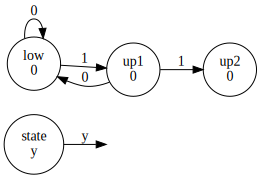

In [5]:
from graphviz import Digraph

f = Digraph('finite_state_machine')
f.attr(rankdir='LR', size='10')
f.attr('node', shape='none')
f.node("")

f.attr('node', shape='circle')
f.edge("state\ny", "", label='y')
f.edge('low\n0', 'low\n0', label='0')
f.edge('low\n0', 'up1\n0', label='1')
f.edge('up1\n0', 'low\n0', label='0')
f.edge('up1\n0', 'up2\n0', label='1')
f

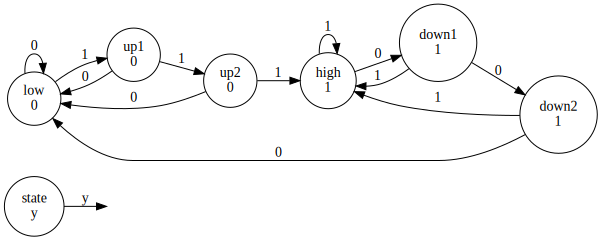

In [6]:
from graphviz import Digraph

f = Digraph('finite_state_machine')
f.attr(rankdir='LR', size='10')
f.attr('node', shape='none')
f.node("")

f.attr('node', shape='circle')
f.edge("state\ny", "", label='y')
f.edge('low\n0', 'low\n0', label='0')
f.edge('low\n0', 'up1\n0', label='1')
f.edge('up1\n0', 'low\n0', label='0')
f.edge('up1\n0', 'up2\n0', label='1')
f.edge('up2\n0', 'high\n1', label='1')
f.edge('up2\n0', 'low\n0', label='0')
f.edge('high\n1', 'high\n1', label='1')
f.edge('high\n1', 'down1\n1', label='0')
f.edge('down1\n1', 'high\n1', label='1')
f.edge('down1\n1', 'down2\n1', label='0')
f.edge('down2\n1', 'high\n1', label='1')
f.edge('down2\n1', 'low\n0', label='0')

f

### Development from a scenario
The second way to develop a state graph is to define a scenario. To do this
* a scenario can be defined that covers a large part of the requirements specification. 
* The scenario must be developed in the form of a graph, with the states corresponding to the stages of the scenario and the arrows corresponding to the actions.
* For each state defined in this way, all possible input conditions ($2^n$ cases for $n$ inputs) must be analysed and the arrows not yet present drawn. Sometimes new states arise, which in this case have to be analyzed completely.

#### Example Debouncing Circuit
See figure below

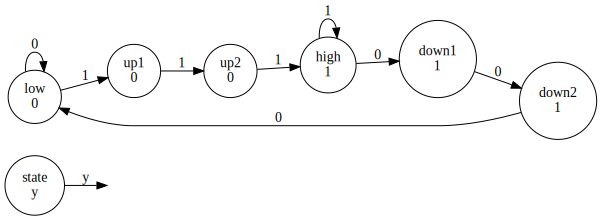

In [7]:
from graphviz import Digraph

f = Digraph('finite_state_machine')
f.attr(rankdir='LR', size='10')
f.attr('node', shape='none')
f.node("")

f.attr('node', shape='circle')
f.edge("state\ny", "", label='y')
f.edge('low\n0', 'low\n0', label='0')
f.edge('low\n0', 'up1\n0', label='1')
f.edge('up1\n0', 'up2\n0', label='1')
f.edge('up2\n0', 'high\n1', label='1')
f.edge('high\n1', 'high\n1', label='1')
f.edge('high\n1', 'down1\n1', label='0')
f.edge('down1\n1', 'down2\n1', label='0')
f.edge('down2\n1', 'low\n0', label='0')

f

### Development from a State list
In order to develop a state graph in the third way, its states must be known in advance. For this
* the events or states to be stored are determined.
* A state is drawn for each event to be stored.
* For each defined state, all possible input conditions ($2^n$ cases for $n$ inputs) are analyzed and the corresponding arrows are drawn. 

#### Example Debouncing Circuit
See figure below

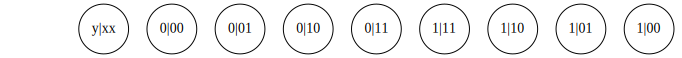

In [30]:
from graphviz import Digraph

f = Digraph('finite_state_machine')
f.attr(rankdir='10.10', size='10')
f.attr('node', shape='none')
f.node("")
f.attr('node', shape='circle',constraint='false')
f.node("y|xx")
f.node("0|00")
f.node("0|01")
f.node("0|10")
f.node("0|11")
f.node("1|11")
f.node("1|10")
f.node("1|01")
f.node("1|00")

f

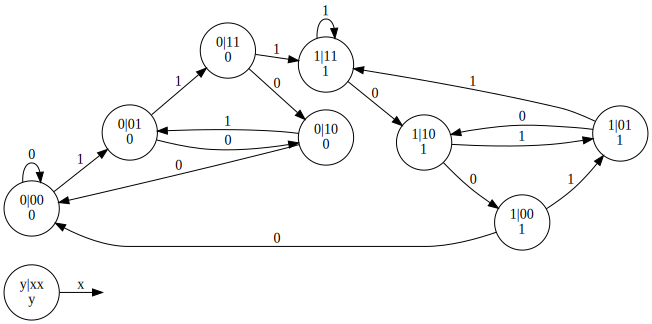

In [17]:
from graphviz import Digraph

f = Digraph('finite_state_machine')
f.attr(rankdir='LR', size='10')
f.attr('node', shape='none')
f.node("")

f.attr('node', shape='circle')
f.edge("y|xx\ny", "", label="x")
f.edge("0|00\n0", "0|00\n0", label="0")
f.edge("0|00\n0", "0|01\n0", label="1")
f.edge("0|01\n0", "0|10\n0", label="0")
f.edge("0|01\n0", "0|11\n0", label="1")
f.edge("0|11\n0", "0|10\n0", label="0")
f.edge("0|11\n0", "1|11\n1", label="1")
f.edge("1|11\n1", "1|11\n1", label="1")
f.edge("1|11\n1", "1|10\n1", label="0")
f.edge("1|10\n1", "1|01\n1", label="1")
f.edge("1|10\n1", "1|00\n1", label="0")
f.edge("1|00\n1", "1|01\n1", label="1")
f.edge("1|00\n1", "0|00\n0", label="0")
f.edge("1|01\n1", "1|11\n1", label="1")
f.edge("1|01\n1", "1|10\n1", label="0")
f.edge("0|10\n0", "0|01\n0", label="1")
f.edge("0|10\n0", "0|00\n0", label="0")

f